In [ ]:
"""多项式回归代码实现""" 
import torch 
from torch.autograd import Variable 
import torch.nn as nn 
import torch.optim as optim 
import matplotlib.pyplot as plt 
import numpy as np 

In [1]:
def make_features(x):
    """Builds features i.e. a matrix with columns [x, x^2, x^3].""" 
    x = x.unsqueeze(1) 
    return torch.cat([x ** i for i in range(1, 4)], 1) 


def f(x):
    """Approximated function.""" 
    return x.mm(W_target) + b_target[0] 


def get_batch(batch_size=32):
    """Builds a batch i.e. (x, f(x)) pair.""" 
    random = torch.randn(batch_size) 
    random = np.sort(random) 
    random = torch.Tensor(random) 
    x = make_features(random) 
    y = f(x) 
    if torch.cuda.is_available(): 
        return Variable(x).cuda(), Variable(y).cuda() 
    else: 
        return Variable(x), Variable(y) 

In [2]:
class poly_model(nn.Module): 
    def __init__(self):
        super(poly_model, self).__init__() 
        self.poly = nn.Linear(3, 1) 
        
    def forward(self, x): 
        out = self.poly(x) 
        return out 


In [4]:
if __name__ == '__main__':
    W_target = torch.FloatTensor([0.5, 3, 2.4]).unsqueeze(1)
    b_target = torch.FloatTensor([0.9]) 
    if torch.cuda.is_available(): 
        model = poly_model().cuda() 
    else: 
        model = poly_model()
        
    criterion = nn.MSELoss() 
    optimizer = optim.SGD(model.parameters(), lr=1e-3)
    
    epoch = 0 
    while True: 
        # Get data 
        batch_x, batch_y = get_batch() 
        # Forward pass 
        output = model(batch_x) 
        loss = criterion(output, batch_y) 
        print_loss = loss.item() 
        # Reset gradients 
        optimizer.zero_grad() 
        # Backward pass 
        loss.backward() 
        # update parameters 
        optimizer.step() 
        epoch += 1 
        if print_loss < 1e-3: 
            break

Loss: 0.000996  after 1803 batches
==> Learned function: y = 0.93 + 0.45*x + 2.99*x^2 + 2.41*x^3
==> Actual function: y = 0.90 + 0.50*x + 3.00*x^2 + 2.40*x^3


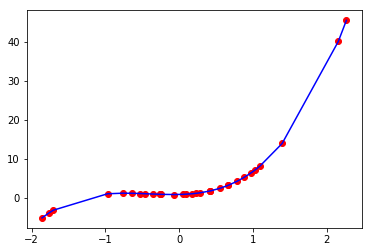

In [5]:
print("Loss: {:.6f}  after {} batches".format(loss.item(), epoch)) 
print( "==> Learned function: y = {:.2f} + {:.2f}*x + {:.2f}*x^2 + {:.2f}*x^3".format(model.poly.bias[0], model.poly.weight[0][0], model.poly.weight[0][1], model.poly.weight[0][2]))
print("==> Actual function: y = {:.2f} + {:.2f}*x + {:.2f}*x^2 + {:.2f}*x^3".format(b_target[0], W_target[0][0], W_target[1][0], W_target[2][0])) 
predict = model(batch_x) 
batch_x = batch_x.cpu()
batch_y = batch_y.cpu()
x = batch_x.numpy()[:, 0] 
plt.plot(x, batch_y.numpy(), 'ro') 
predict = predict.cpu() 
predict = predict.data.numpy() 
plt.plot(x, predict, 'b') 
plt.show()
